## Introduction

Chronic Kidney disease is the gradual loss of function of the kidney with no symptoms being manifested. <sup>[1](https://en.wikipedia.org/wiki/Chronic_kidney_disease)</sup>  It's difficult to know the burden of the disease since they are no accurate diagnostic tests according to research done [here](https://www.sciencedirect.com/science/article/pii/S2214109X14700026). It could be characterized by [uremic frost](https://en.wikipedia.org/wiki/Uremic_frost); however,  careful diagnosis of the condition should be followed such as testing kidney function URI scan dripstick test for example the specific gravity -- low values(1.01 - 1.010) could mean that the patient has kidney damage, observation of the urine using microscopy and identification of [casts](https://slideplayer.com/slide/4381644/14/images/36/URINE+ANALYSIS+Microscopic+Examination+(Casts)) and other tests can help make a proper diagnosis.  

In this notebook, we'll use data with 25 features that could be indicative of chronic kidney disease to see if predictive modelling could help us figure out which patients have chronic kidney disease. You can read more about the dataset using this [link](https://www.kaggle.com/mansoordaku/ckdisease). Let's proceed to exploratory data analysis.


I first import all the packages that could be useful in wrangling, visualization and statistical modelling. I apologise if there's a package here that I have imported but I haven't used it. It may have slipped my mind for some reason.

In [52]:
import numpy as np # numeric processing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split  
from IPython.display import HTML
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from functools import *
import ydata_profiling
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

Turicreate is a machine learning library by apple. There's some functionality that I was interested in that I wanted to try. In future, I may add it to the notebook. If you want more information about the library.  Find for information [here.](https://github.com/apple/turicreate)

In [53]:
#!pip install turicreate -q

## Loading data and Exploratory data analysis
In this analysis, we'll do predictive modelling in hopes of finding a model which will be able to classify the patients appropriately.

Download the dataset from [here](https://www.kaggle.com/mansoordaku/ckdisease) and load it into the notebook.

In [54]:
!chmod a+x get_data.sh
!./get_data.sh

This may take a few minutes...
Link: https://www.kaggle.com/mansoordaku/ckdisease
Dataset URL: https://www.kaggle.com/datasets/mansoordaku/ckdisease
License(s): unknown
  0%|                                               | 0.00/9.51k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 9.51k/9.51k [00:00<00:00, 17.4MB/s]
Archive:  ckdisease.zip
  inflating: kidney_disease.csv      
Dataset downloaded successfully and moved to data folder
kidney_disease.csv


In [55]:
# load the dataset with pandas read_csv function
df = pd.read_csv('data/input/kidney_disease.csv', index_col="id")

# give the dtypes of the columns if the data was squeeky clean
dtypes = {
    'id' : np.int32,
    'age' : np.int32,
    'bp' : np.float32,
    'sg' : object, # category
    'al' : object, # category # mistake
    'su' : object, #category  # mistake
    'rbc' : object, # category
    'pc' : object, # category
    'pcc' : object, # category
    'ba' : object, # category
    'bgr' : np.float32, 
    'bu' : np.int32,
    'sc' : np.float32,
    'sod': np.int32,
    'pot' : np.float32,
    'hemo' : np.float32,
    'pcv' : np.int32,
    'wc' : np.int32,
    'rc' : np.int32,
    'htn' : object,
    'dm' : object,
    'cad' : object,
    'appet': object,
    'pe' : object,
    'ane' : object,
    'class': object}

# another way of reading in the datasets especially very big files like 1GB big
# df2 = dd.read_csv('../input/kidney_disease.csv', dtype=dtypes)
# id                400 non-null int64
# age               391 non-null float64
# bp                388 non-null float64
# sg                353 non-null float64
# al                354 non-null float64
# su                351 non-null float64
# rbc               248 non-null object
# pc                335 non-null object
# pcc               396 non-null object
# ba                396 non-null object
# bgr               356 non-null float64
# bu                381 non-null float64
# sc                383 non-null float64
# sod               313 non-null float64
# pot               312 non-null float64
# hemo              348 non-null float64
# pcv               330 non-null object
# wc                295 non-null object
# rc                270 non-null object
# htn               398 non-null object
# dm                398 non-null object
# cad               398 non-null object
# appet             399 non-null object
# pe                399 non-null object
# ane               399 non-null object
# classification    400 non-null object

In [56]:
# see the first couple of observations and transpose 10 observations
# think of it as rolling over your dataset
df.head(10).transpose()

id                       0           1           2           3           4  \
age                   48.0         7.0        62.0        48.0        51.0   
bp                    80.0        50.0        80.0        70.0        80.0   
sg                    1.02        1.02        1.01       1.005        1.01   
al                     1.0         4.0         2.0         4.0         2.0   
su                     0.0         0.0         3.0         0.0         0.0   
rbc                    NaN         NaN      normal      normal      normal   
pc                  normal      normal      normal    abnormal      normal   
pcc             notpresent  notpresent  notpresent     present  notpresent   
ba              notpresent  notpresent  notpresent  notpresent  notpresent   
bgr                  121.0         NaN       423.0       117.0       106.0   
bu                    36.0        18.0        53.0        56.0        26.0   
sc                     1.2         0.8         1.8         3.8         1.4   
sod                    NaN         NaN         NaN       111.0         NaN   
pot                    NaN         NaN         NaN         2.5         NaN   
hemo                  15.4        11.3         9.6        11.2        11.6   
pcv                     44          38          31          32          35   
wc                    7800        6000        7500        6700        7300   
rc                     5.2         NaN         NaN         3.9         4.6   
htn                    yes          no          no         yes          no   
dm                     yes          no         yes          no          no   
cad                     no          no          no          no          no   
appet                 good        good        poor        poor        good   
pe                      no          no          no         yes          no   
ane                     no          no         yes         yes          no   
classification         ckd         ckd         ckd         ckd         ckd   

id                       5           6           7           8           9  
age                   60.0        68.0        24.0        52.0        53.0  
bp                    90.0        70.0         NaN       100.0        90.0  
sg                   1.015        1.01       1.015       1.015        1.02  
al                     3.0         0.0         2.0         3.0         2.0  
su                     0.0         0.0         4.0         0.0         0.0  
rbc                    NaN         NaN      normal      normal    abnormal  
pc                     NaN      normal    abnormal    abnormal    abnormal  
pcc             notpresent  notpresent  notpresent     present     present  
ba              notpresent  notpresent  notpresent  notpresent  notpresent  
bgr                   74.0       100.0       410.0       138.0        70.0  
bu                    25.0        54.0        31.0        60.0       107.0  
sc                     1.1        24.0         1.1         1.9         7.2  
sod                  142.0       104.0         NaN         NaN       114.0  
pot                    3.2         4.0         NaN         NaN         3.7  
hemo                  12.2        12.4        12.4        10.8         9.5  
pcv                     39          36          44          33          29  
wc                    7800         NaN        6900        9600       12100  
rc                     4.4         NaN           5         4.0         3.7  
htn                    yes          no          no         yes         yes  
dm                     yes          no         yes         yes         yes  
cad                     no          no          no          no          no  
appet                 good        good        good        good        poor  
pe                     yes          no         yes          no          no  
ane                     no          no          no         yes         yes  
classification         ckd         ckd        

In [57]:
# see the column names  
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [58]:
# see a concise summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


* 26 columns and a variable number of observations per feature/variable

* 400 rows for each id - there could be missing data among the rows of the variable

In [59]:
# display summary statistics of each column
# this helps me confirm my assertion on missing data
df.describe(include="all").transpose()

count unique         top freq        mean        std    min  \
age             391.0    NaN         NaN  NaN   51.483376  17.169714    2.0   
bp              388.0    NaN         NaN  NaN   76.469072  13.683637   50.0   
sg              353.0    NaN         NaN  NaN    1.017408   0.005717  1.005   
al              354.0    NaN         NaN  NaN    1.016949   1.352679    0.0   
su              351.0    NaN         NaN  NaN    0.450142   1.099191    0.0   
rbc               248      2      normal  201         NaN        NaN    NaN   
pc                335      2      normal  259         NaN        NaN    NaN   
pcc               396      2  notpresent  354         NaN        NaN    NaN   
ba                396      2  notpresent  374         NaN        NaN    NaN   
bgr             356.0    NaN         NaN  NaN  148.036517  79.281714   22.0   
bu              381.0    NaN         NaN  NaN   57.425722  50.503006    1.5   
sc              383.0    NaN         NaN  NaN    3.072454   5.741126    0.4   
sod             313.0    NaN         NaN  NaN  137.528754  10.408752    4.5   
pot             312.0    NaN         NaN  NaN    4.627244   3.193904    2.5   
hemo            348.0    NaN         NaN  NaN   12.526437   2.912587    3.1   
pcv               330     44          41   21         NaN        NaN    NaN   
wc                295     92        9800   11         NaN        NaN    NaN   
rc                270     49         5.2   18         NaN        NaN    NaN   
htn               398      2          no  251         NaN        NaN    NaN   
dm                398      5          no  258         NaN        NaN    NaN   
cad               398      3          no  362         NaN        NaN    NaN   
appet             399      2        good  317         NaN        NaN    NaN   
pe                399      2          no  323         NaN        NaN    NaN   
ane               399      2          no  339         NaN        NaN    NaN   
classification    400      3         ckd  248         NaN        NaN    NaN   

                  25%    50%    75%    max  
age              42.0   55.0   64.5   90.0  
bp               70.0   80.0   80.0  180.0  
sg               1.01   1.02   1.02  1.025  
al                0.0    0.0    2.0    5.0  
su                0.0    0.0    0.0    5.0  
rbc               NaN    NaN    NaN    NaN  
pc                NaN    NaN    NaN    NaN  
pcc               NaN    NaN    NaN    NaN  
ba                NaN    NaN    NaN    NaN  
bgr              99.0  121.0  163.0  490.0  
bu               27.0   42.0   66.0  391.0  
sc                0.9    1.3    2.8   76.0  
sod             135.0  138.0  142.0  163.0  
pot               3.8    4.4    4.9   47.0  
hemo             10.3  12.65   15.0   17.8  
pcv               NaN    NaN    NaN    NaN  
wc                NaN    NaN    NaN    NaN  
rc                NaN    NaN    NaN    NaN  
htn               NaN    NaN    NaN    NaN  
dm                NaN    NaN    NaN    NaN  
cad               NaN    NaN    NaN    NaN  
appet             NaN    NaN    NaN    NaN  
pe                NaN    NaN    NaN    NaN  
ane               NaN    NaN    NaN    NaN  
classification    NaN    NaN    NaN    NaN

In [60]:
# Looking at variables interractively 

profile = ydata_profiling.ProfileReport(df)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The good news is that we can work with the current state of the columns since they have been labelled consistently. Bad news is that we have a lot of missing data in this dataset. Let's proceed and find out the number of missing values per column and if the classes are balanced or unbalanced. The profiler did the work already but sometimes it is good to confirm it your own way.

In [61]:
# looking for the number of missing observations 
# In the code below a boolean is being tried on each observation asking if the observation is missing or not
# then add all instances of NaN(Not a number) 
missing_values = df.isnull().sum()

# calculating the percentage of missing values in the dataframe
# simply taking the sum of the values we got above dividing by the no of observations in the df
# you could use len(df) instead df.index.size
missing_count_pct = ((missing_values / df.index.size) * 100)

# see how many observations are missing
print(missing_count_pct)

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


In [62]:
# take the missing count percentage and use boolean mask to filter out columns 
# whose observation threshold is greater than 25 percent 
# 25 is a random number chosen based how much missing data is in the dataset
# 25-50 is normally a red flag since most data is missing
columns_to_drop = missing_count_pct[missing_count_pct > 25].index

# remove columns that meet that threshold and save result in column df_dropped
df_dropped = df.drop(columns_to_drop, axis=1)

In [63]:
# number of columns remaining after filtering
df.columns.size - df_dropped.columns.size

# only three columns are lost

3

I really hate losing a few columns. I won't throw everything away. But, I will keep these columns while we are doing predictive modelling use the different variants of the datasets and see if there will be any boost in results. In the meantime, let's look at the code book to come up with a hypothesis to find out  which columns are the most important and converting the types of each column to another format that will speed up computation during training.

In [64]:
# look at the code book on kaggle and write which columns could be useful here

According to the original site where we found data [here.](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease). I found the identity of the columns rather what the columns mean. I'll put a star on the columns i think are important from my background in medical laboratory science. Then the second run through this notebook we could explore only the columns i think are important and lastly use a technique called singular value decomposition to figure out which ones are the most important.

age - age

bp - blood pressure *

sg - specific gravity *

al - albumin *

su - sugar *

rbc - red blood cells *

pc - pus cell*

pcc - pus cell clumps *

ba - bacteria*

bgr - blood glucose random

bu - blood urea*

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin*

pcv - packed cell volume

wc - white blood cell count*

rc - red blood cell count*

htn - hypertension*

dm - diabetes mellitus*

cad - coronary artery disease*

appet - appetite*

pe - pedal edema*

ane - anemia*

class - class* 

In [65]:
# checking the types of the column to figure out the best next steps of conversion of data types
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Review the columns from the original codebook to determine the datatypes then make a schema which we can follow as i import the dataset

In [66]:
# fix the columns to be of the categorical type
# if the value is missing replace the NA with the word miss
constant_imputer = SimpleImputer(strategy="constant", fill_value = "miss")

# apply it to categorical columns
df[["rbc"]] = constant_imputer.fit_transform(df[["rbc"]])
df[["pcc"]] = constant_imputer.fit_transform(df[["pcc"]])

# converting the types to be categorical
# Go ahead and use a function here
df['rbc'] = df['rbc'].astype("category")
df['pc'] = df['pc'].astype("category")
df["pcc"] = df['pcc'].astype("category")
df['ba'] = df['ba'].astype("category")
df['appet'] = df['appet'].astype("category")
df['pe'] = df['pe'].astype("category")
df['ane'] = df['ane'].astype("category")
df['classification'] = df['classification'].astype("category")
df['htn'] = df['htn'].astype("category")
df['dm'] = df['dm'].astype("category")
df['cad'] = df['cad'].astype("category")


# confirm the dtypes now
df.dtypes

age                float64
bp                 float64
sg                 float64
al                 float64
su                 float64
rbc               category
pc                category
pcc               category
ba                category
bgr                float64
bu                 float64
sc                 float64
sod                float64
pot                float64
hemo               float64
pcv                 object
wc                  object
rc                  object
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object

In [67]:
# seeing the columns in list form thinking mode
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [68]:
# make a copy of the whole dataset
df_copy = df.copy()

# remove the target column for the other uses in the next steps
#df = df.drop("classification", axis = 1)

In [69]:
# using a boolean to figure out which columns are of type object and numeric to do other preprocessing 
# in the workflow
object_columns = df.dtypes == "object"
numeric_columns = df.dtypes == "float64"
category_columns = df.dtypes == "category"

In [70]:
# use regular expressions to fix it and this is supposed to be one of the first steps after df.dtypes command. If it's categorical 
# you can replace it with anything you want here I use -999 to replace the data entries the tab character to flag them as outliers.
# I change the dtypes so to 32 bit to save memory

df['pcv'] = df['pcv'].replace("\t?",-999).fillna(0).astype("int32") # use  str.replace on column to something meaningful
df['wc'] = df['wc'].replace("\t?", -999).fillna(0).astype("int32") # use  str.replace on column to something meaningful
df['rc'] = df['rc'].replace("\t?", -999).fillna(0).astype("float32") # use  str.replace on column to something meaningful

# exploring another imputation strategy that uses the median 
# mean_imputer = SimpleImputer(strategy="median")
# df["pcv"] = mean_imputer.fit_transform(df["pcv"])
# df["wc"] = mean_imputer.fit_transform(df["wc"])
# df["rc"] = mean_imputer.fit_transform(df["rc"])

In [71]:
# write code to extract columns of the type object and numeric
# Make a boolean mask for categorical columns
cat_mask_obj = (df.dtypes == "object") | (df.dtypes == "category")

# Get list of categorical column names
cat_mask_object = df.columns[cat_mask_obj].tolist()

# now for numerical columns
# anything that was parsed as float64 is numeric: make a boolean mask for that
cat_mask_numeric = (df.dtypes == "float64")
cat_mask_numeric = df.columns[cat_mask_numeric].tolist()

# see the result in a combined list: to the left categorical and the right we have numeric columns
print(cat_mask_object, "\n", cat_mask_numeric)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification'] 
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [72]:
# convert all instances of the float 64 to float 32 to speed up computation in the subsequent steps
# remove all the missing values and make sure that they are all numeric
numeric_columns_float32 = df[cat_mask_numeric].astype("float32").fillna(0)

In [73]:
#it's worked
numeric_columns_float32.dtypes

age     float32
bp      float32
sg      float32
al      float32
su      float32
bgr     float32
bu      float32
sc      float32
sod     float32
pot     float32
hemo    float32
dtype: object

In [74]:
# Task: split the category columns and object columns to the right type
# you can import the dataset to have the right types too upon import
# you can do this the next time you have time to continue working on this add it as comment though

They are some columns that are wrongly parsed due to the NAs. They include: pcv(numerical int32), rc(numerical int32). I can either interpolate the missing columns depending how they'll look like in a plot or use mean/median to find the value.

In [75]:
# it makes sense that they are some individuals who were not sampled therefore filling the whole dataset with NAs makes sense
# these two columns have data entry problems
# use regular expressions to fix it and this is supposed to be one of the first steps after df.dtypes command. If it's categorical 
# you can replace it with anything you want
#df['pcv'] = df['pcv'].fillna(0, inplace = True)
#df['rc'] = df['rc'].fillna(0, inplace = True)
#df['wc'] = df['wc'].fillna(0, inplace = True)

In [76]:
# finding the number of null or NA values in the columns
pd.isnull(df).sum()


age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                65
pcc                0
ba                 4
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                0
wc                 0
rc                 0
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [77]:
# checking the dtypes once more 
df.dtypes

age                float64
bp                 float64
sg                 float64
al                 float64
su                 float64
rbc               category
pc                category
pcc               category
ba                category
bgr                float64
bu                 float64
sc                 float64
sod                float64
pot                float64
hemo               float64
pcv                  int32
wc                   int32
rc                 float32
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object

In [78]:
# concatentate the numeric columns with the category columns to build the full dataset and then X and Y
# remove
df[cat_mask_object] = constant_imputer.fit_transform(df[cat_mask_object])

In [79]:
# check for missing values
print(df[cat_mask_object].isnull().sum())
print("*" * 100)
print(numeric_columns_float32.isnull().sum())

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
****************************************************************************************************
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64


In [80]:
# bring the columns together with pd.concat
df_clean = pd.concat([numeric_columns_float32, df[cat_mask_object]], axis = 1)

# check the shape of the columns
df_clean.shape

(400, 22)

In [81]:
# just see the first 10 observations
df_clean.head(10)
# HTML(df_clean.to_html()) see the whole dataframe in HTML format

age     bp     sg   al   su    bgr     bu    sc    sod  pot  ...  \
id                                                                ...   
0   48.0   80.0  1.020  1.0  0.0  121.0   36.0   1.2    0.0  0.0  ...   
1    7.0   50.0  1.020  4.0  0.0    0.0   18.0   0.8    0.0  0.0  ...   
2   62.0   80.0  1.010  2.0  3.0  423.0   53.0   1.8    0.0  0.0  ...   
3   48.0   70.0  1.005  4.0  0.0  117.0   56.0   3.8  111.0  2.5  ...   
4   51.0   80.0  1.010  2.0  0.0  106.0   26.0   1.4    0.0  0.0  ...   
5   60.0   90.0  1.015  3.0  0.0   74.0   25.0   1.1  142.0  3.2  ...   
6   68.0   70.0  1.010  0.0  0.0  100.0   54.0  24.0  104.0  4.0  ...   
7   24.0    0.0  1.015  2.0  4.0  410.0   31.0   1.1    0.0  0.0  ...   
8   52.0  100.0  1.015  3.0  0.0  138.0   60.0   1.9    0.0  0.0  ...   
9   53.0   90.0  1.020  2.0  0.0   70.0  107.0   7.2  114.0  3.7  ...   

          pc         pcc          ba  htn   dm cad appet   pe  ane  \
id                                                                   
0     normal  notpresent  notpresent  yes  yes  no  good   no   no   
1     normal  notpresent  notpresent   no   no  no  good   no   no   
2     normal  notpresent  notpresent   no  yes  no  poor   no  yes   
3   abnormal     present  notpresent  yes   no  no  poor  yes  yes   
4     normal  notpresent  notpresent   no   no  no  good   no   no   
5       miss  notpresent  notpresent  yes  yes  no  good  yes   no   
6     normal  notpresent  notpresent   no   no  no  good   no   no   
7   abnormal  notpresent  notpresent   no  yes  no  good  yes   no   
8   abnormal     present  notpresent  yes  yes  no  good   no  yes   
9   abnormal     present  notpresent  yes  yes  no  poor   no  yes   

   classification  
id                 
0             ckd  
1             ckd  
2             ckd  
3             ckd  
4             ckd  
5             ckd  
6             ckd  
7             ckd  
8             ckd  
9             ckd  

[10 rows x 22 columns]

In [82]:
# now see the bottom 10
df_clean.tail(10)

age    bp     sg   al   su    bgr    bu   sc    sod  pot  ...      pc  \
id                                                              ...           
390  52.0  80.0  1.025  0.0  0.0   99.0  25.0  0.8  135.0  3.7  ...  normal   
391  36.0  80.0  1.025  0.0  0.0   85.0  16.0  1.1  142.0  4.1  ...  normal   
392  57.0  80.0  1.020  0.0  0.0  133.0  48.0  1.2  147.0  4.3  ...  normal   
393  43.0  60.0  1.025  0.0  0.0  117.0  45.0  0.7  141.0  4.4  ...  normal   
394  50.0  80.0  1.020  0.0  0.0  137.0  46.0  0.8  139.0  5.0  ...  normal   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  ...  normal   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  ...  normal   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  ...  normal   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  ...  normal   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  ...  normal   

            pcc          ba htn  dm cad appet  pe ane classification  
id                                                                    
390  notpresent  notpresent  no  no  no  good  no  no         notckd  
391  notpresent  notpresent  no  no  no  good  no  no         notckd  
392  notpresent  notpresent  no  no  no  good  no  no         notckd  
393  notpresent  notpresent  no  no  no  good  no  no         notckd  
394  notpresent  notpresent  no  no  no  good  no  no         notckd  
395  notpresent  notpresent  no  no  no  good  no  no         notckd  
396  notpresent  notpresent  no  no  no  good  no  no         notckd  
397  notpresent  notpresent  no  no  no  good  no  no         notckd  
398  notpresent  notpresent  no  no  no  good  no  no         notckd  
399  notpresent  notpresent  no  no  no  good  no  no         notckd  

[10 rows x 22 columns]

In [83]:
HTML(df.to_html()) # just looking for something I may have missed in the pandas profiling

In [84]:
# some further cleaning is required to remove the \t characters is a couple of columns replacing the instances with the standard formating 
# classification, cad,  dm
df_clean['classification'] = df_clean['classification'].replace("ckd\t","ckd")
df_clean['cad'] = df_clean['cad'].replace("\tno","no")
df_clean['dm'] = df_clean['dm'].replace("\tno","no")
df_clean['dm'] = df_clean['dm'].replace("\tyes", "yes")
df_clean['dm'] = df_clean['dm'].replace(" yes", "yes")

In [85]:

# subsetting columns with another boolean mask for categorical columns and object columns
cat_mask_obj2 = (df_clean.dtypes == "object") | (df_clean.dtypes == "category")

# Get list of categorical column names
cat_mask_object2 = df_clean.columns[cat_mask_obj2].tolist()

# remove the column classification 
cat_mask_object2.remove("classification")

# see what columns are left
print(cat_mask_object2)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [86]:
# look into the XGBoost course to figure out how the categorical imputer works
# combine everything and use DictVectorizer for one hot encoding and label encoding

# conversion of our dataframe into a dictionary so as to use DictVectorizer
# this function is mostly used in text processing
df_dict = df_clean[cat_mask_object2].to_dict("records")

# Make a DictVectorizer: use documentation to learn how it works
# In short, it speeds up one hot encoding with meaningful columns created
# we don't want a sparse matrix right?
dv = DictVectorizer(sparse = False)

# Apply fit_transform to our dataset
df_encoded = dv.fit_transform(df_dict)

# see 10 rows
print (df_encoded[:10,:])
print ("=" * 100) # just formatting to distinguish outputs

# print the vocabulary that is, the columns of the dataset, note that order changes
# upon transformation
print(dv.vocabulary_)
print ("=" * 100) # more formatting

print(df_encoded.shape) # number of rows and columns for the encoded dataset
print(df_clean[cat_mask_object2].shape) # number of rows and columns for the original dataset
print("After doing the transformation the columns increase to 21.")

[[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
  0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 1. 0. 1. 0. 0.]]
{'rbc=miss': 28, 'pc=normal': 20, 'pcc=notpresent

In [87]:
# You can try
# make a pipeline to merge the encoding as well as the visualization
# Use t-SNE and or PCA to see the differences between groups this will be the EDA step 
# make a train and test split go through the slides for how to win kaggle competitions and test the ideas
# make the next step a pipeline object like in the xgboost course and try random forest, xgboost and decision tree classifier
# later use the ensembling techniques: Try all the ensembling techniques you know.

In [88]:
# see the transformed dataframe with all the missing values imputed
df_clean[cat_mask_numeric]

age    bp     sg   al   su    bgr    bu   sc    sod  pot  hemo
id                                                                  
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    0.0  0.0  15.4
1     7.0  50.0  1.020  4.0  0.0    0.0  18.0  0.8    0.0  0.0  11.3
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    0.0  0.0   9.6
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  11.2
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    0.0  0.0  11.6
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...   ...
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  15.7
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  16.5
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  15.8
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  14.2
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  15.8

[400 rows x 11 columns]

In [89]:
# simply taking the vectorized columns and the numeric columns and bringing them together
# to make an array for a classifier
concat_cols = np.hstack((df_encoded, df_clean[cat_mask_numeric].values))

# another version that is in dataframe format
# make a dataframe with the encoded features and give the columns names from the dictVectorizer
df_cat_var = pd.DataFrame(df_encoded, columns=dv.get_feature_names_out())

# combine the columns together with the categorical features i.e add columns to the numerical dataframe with other dataframe with the categorical and object data types
concat_cols_df = pd.concat([df_clean[cat_mask_numeric], df_cat_var], axis=1)
concat_cols.shape

(400, 41)

In [90]:
# the final dataframe we'll use for classification
concat_cols_df

age    bp     sg   al   su    bgr    bu   sc    sod  pot  ...  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    0.0  0.0  ...   
1     7.0  50.0  1.020  4.0  0.0    0.0  18.0  0.8    0.0  0.0  ...   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    0.0  0.0  ...   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  ...   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    0.0  0.0  ...   
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...  ...   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  ...   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  ...   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  ...   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  ...   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  ...   

     pc=normal  pcc=miss  pcc=notpresent  pcc=present  pe=miss  pe=no  pe=yes  \
0          1.0       0.0             1.0          0.0      0.0    1.0     0.0   
1          1.0       0.0             1.0          0.0      0.0    1.0     0.0   
2          1.0       0.0             1.0          0.0      0.0    1.0     0.0   
3          0.0       0.0             0.0          1.0      0.0    0.0     1.0   
4          1.0       0.0             1.0          0.0      0.0    1.0     0.0   
..         ...       ...             ...          ...      ...    ...     ...   
395        1.0       0.0             1.0          0.0      0.0    1.0     0.0   
396        1.0       0.0             1.0          0.0      0.0    1.0     0.0   
397        1.0       0.0             1.0          0.0      0.0    1.0     0.0   
398        1.0       0.0             1.0          0.0      0.0    1.0     0.0   
399        1.0       0.0             1.0          0.0      0.0    1.0     0.0   

     rbc=abnormal  rbc=miss  rbc=normal  
0             0.0       1.0         0.0  
1             0.0       1.0         0.0  
2             0.0       0.0         1.0  
3             0.0       0.0         1.0  
4             0.0       0.0         1.0  
..            ...       ...         ...  
395           0.0       0.0         1.0  
396           0.0       0.0         1.0  
397           0.0       0.0         1.0  
398           0.0       0.0         1.0  
399           0.0       0.0         1.0  

[400 rows x 41 columns]

In [91]:
# this operation is not necessary but it's good to see the final dataframe
#pd.set_option('future.no_silent_downcasting', True)

In [92]:
# now get the target variable into a numeric form
# there's a simpler step where you can use map instead  y = df_clean["classification"].map(lambda val1: 1 if val1 == "ckd" else 0)
# y = y.values
col_preprocess = df_clean["classification"].replace("ckd", 1) 
final_col_preprocess = col_preprocess.replace("notckd", 0)
y = final_col_preprocess.values
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [93]:
# confirm if the shape of the vector and matrix
print(concat_cols.shape)
print(y.shape)

(400, 41)
(400,)


In [94]:
# now that we have both matrices we can see the distribution of the target variable to know what to do next
# when it comes to preprocessing 
final_col_preprocess.reset_index()["classification"].value_counts(normalize=True)

classification
1    0.625
0    0.375
Name: proportion, dtype: float64

## Split the dataframe to 3 for more training and compare result with the same configuration set

In [95]:
# 3 split to evaluate model performance: do this to evaluate models better
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(concat_cols_df, y, test_size=0.4, random_state=100)
features_validation, features_test, labels_validation, labels_test = train_test_split( features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [96]:
# The patients with chronic kidney disease are more than those who don't have .63 ckd and .38 for nonckd
# The dataset is imbalanced, we can't use the regular accuracy as an evaluation metric instead confusion matrix and F1 score
# we don't want more of the train set in either so I guess stratify is good option
# I changed the 0.5:0.5 to 0.75:0.25
x_train, x_test, y_train, y_test = train_test_split(concat_cols_df, y, test_size = 0.25, stratify = y, random_state=1243)


In [97]:
# Check if the dimensionality is the same for the feature and target set (train)
print("Is the number of rows the same between the features and the target?") 
assert x_train.shape[0] == y_train.shape[0]
print (True)


Is the number of rows the same between the features and the target?
True


In [98]:
# Check if the dimensionality is the same for the feature and target set (test)
print("Is the number of rows the same between the features and the target?") 
assert x_test.shape[0] == y_test.shape[0]
print (True)


Is the number of rows the same between the features and the target?
True


In [99]:
# Now checking if the target variable is balanced in the train set
pd.Series(y_train).value_counts(normalize=True)

1    0.623333
0    0.376667
Name: proportion, dtype: float64

In [100]:
# They are still unbalanced now. Therefore, will have to use the f1 score and change the class weight of the algorithms used like logistic regression

In [101]:
# look at the instances of the labels 0 and 1 
pd.Series(y_test).value_counts(normalize=True)

1    0.63
0    0.37
Name: proportion, dtype: float64

In [105]:
# convert all the target variables to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)



In [107]:
# normal scikit learn paradigm of specify, fit and predict for logistic regression or continuos perceptron
clf_lr1 = LogisticRegression(class_weight="balanced", random_state=1243, max_iter=1000)

clf_lr1.fit(x_train,y_train)

preds1 = clf_lr1.predict(x_test)

# using f1 score instead of other metrics
score_vote1 = f1_score(preds1, y_test)
print('F1-Score: {:.3f}'.format(score_vote1))

# Calculate the classification report
report1 = classification_report(y_test, preds1,target_names=["notckd", "ckd"])
print(report1)

F1-Score: 0.992
              precision    recall  f1-score   support

      notckd       0.97      1.00      0.99        37
         ckd       1.00      0.98      0.99        63

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [108]:
# Specify the Decision tree classifier: asks a bunch of if-else statements to come up with a decision
# adjust the number of min samples leaf based on the game 20 questions (From deep learning for coders by Jeremy Howard)
clf_dt2 = DecisionTreeClassifier(class_weight = "balanced",random_state=1243)

clf_dt2.fit(x_train,y_train)

preds2 = clf_dt2.predict(x_test)

score_vote2 = f1_score(preds2, y_test)
print('F1-Score: {:.3f}'.format(score_vote2))

# Calculate the classification report
report2 = classification_report(y_test, preds2, target_names=["notckd", "ckd"])
print(report2)

F1-Score: 0.959
              precision    recall  f1-score   support

      notckd       0.88      1.00      0.94        37
         ckd       1.00      0.92      0.96        63

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



In [111]:
# check the parameters of the decision tree classifier in new lines to see what you can change
clf_dt2.get_params().keys()


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [112]:
# normalize data functions
# log, z scores(standardized_data), dimensionality reduction with PCA(dim_reduction) and making a function that combines another function(compose2)
def skew (data):
    skewed_data = np.log(data)
    return skewed_data


def standardized_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

def dim_reduction(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)


def compose2(f, g):
    return lambda *a, **kw: f(g(*a, **kw))

def compose(*fs):
    return reduce(compose2, fs)


# returns an error due to the points being too small
normalize_data = compose2(skew, standardized_data)

# mean of 0 and a std 1 for all the columns
scaled_x_train = standardized_data(x_train)
scaled_x_test = standardized_data(x_test)

# add for the smaller datasets
scaled_features_validation = standardized_data(features_validation)
scaled_features_test = standardized_data(features_test)

# reduce dimensionality to 2
transform_data = compose2(standardized_data, dim_reduction)
dim_red_x_train = transform_data(x_train)
dim_red_x_test = transform_data(x_test)


In [113]:
# Logistic regression just a modified perceptron algorithm that uses the sigmoid function therefore an continous perceptron
clf_lr3 = LogisticRegression(class_weight="balanced",random_state=1243)

clf_lr3.fit(scaled_x_train,y_train)

preds3 = clf_lr3.predict(scaled_x_test)

score_vote3 = f1_score(preds3, y_test)
print('F1-Score: {:.3f}'.format(score_vote3))

# Calculate the classification report
report3= classification_report(y_test, preds3,target_names=["notckd", "ckd"])
print(report3)

F1-Score: 0.976
              precision    recall  f1-score   support

      notckd       0.93      1.00      0.96        37
         ckd       1.00      0.95      0.98        63

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



In [114]:
# Logistic regression but the features have been compressed
clf_lr5 = LogisticRegression(class_weight="balanced",random_state=1243)

clf_lr5.fit(dim_red_x_train,y_train)

preds5 = clf_lr5.predict(dim_red_x_test)

score_vote5 = f1_score(preds5, y_test)
print('F1-Score: {:.3f}'.format(score_vote5))

# Make a classification report
report5 = classification_report(y_test, preds5,target_names=["notckd", "ckd"])
print(report5)

F1-Score: 0.603
              precision    recall  f1-score   support

      notckd       0.40      0.51      0.45        37
         ckd       0.66      0.56      0.60        63

    accuracy                           0.54       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.57      0.54      0.55       100



In [115]:
# Decision tree classifier but with scaled features
clf_dt4 = DecisionTreeClassifier(class_weight="balanced", random_state=1243, min_samples_leaf=25)

clf_dt4.fit(scaled_x_train,y_train)

preds4 = clf_dt4.predict(scaled_x_test)

score_vote4 = f1_score(preds4, y_test)
print('F1-Score: {:.3f}'.format(score_vote4))

# Make a classification report
report4 = classification_report(y_test, preds4, target_names=["notckd", "ckd"],)
print(report4)

F1-Score: 0.879
              precision    recall  f1-score   support

      notckd       0.74      0.95      0.83        37
         ckd       0.96      0.81      0.88        63

    accuracy                           0.86       100
   macro avg       0.85      0.88      0.86       100
weighted avg       0.88      0.86      0.86       100



In [116]:
# take the coefficient and see the dimension
clf_lr1.coef_.shape

(1, 41)

## To do: Tests for overfitting

In [117]:
# helps with visualizing the decision function for the classifier
def plot_points(features, labels):
    '''
    
    '''
    X = np.array(features) # convert data into an numpy array: features
    y = np.array(labels) # convert data into an numpy array: labels
    ckd = X[np.argwhere(y==1)] # get all instances where the features are for individuals with ckd
    notckd = X[np.argwhere(y==0)] # get all instances where the features are for individuals without ckd
    plt.scatter([s[0][0] for s in ckd],
                [s[0][1] for s in ckd],
                s = 30,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in notckd],
                [s[0][1] for s in notckd],
                s = 30,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['ckd','notckd'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

In [118]:
# Trying to visualize the function but this didn't work so well
X = np.array(concat_cols)
y = np.array(y)
ckd = X[np.argwhere(y==0)]
notckd = X[np.argwhere(y==1)]

plt.scatter([s[0][0] for s in ckd],
                [s[0][1] for s in ckd],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
plt.scatter([s[0][0] for s in notckd],
                [s[0][1] for s in notckd],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
plt.xlabel('ckd')
plt.ylabel('notckd')
plt.legend(['ckd','notckd'])

In [119]:
# This needs some fixing: Please ignore this for now.
plot_points(scaled_x_train, y_train)
draw_line(1,1, clf_lr1.fit_intercept)

In [120]:
# Check this out https://github.com/luisguiserrano/manning/blob/master/Chapter%205%20-%20Logistic%20Regression/Coding%20the%20Logistic%20Regression%20Algorithm.ipynb

In [121]:
%matplotlib inline

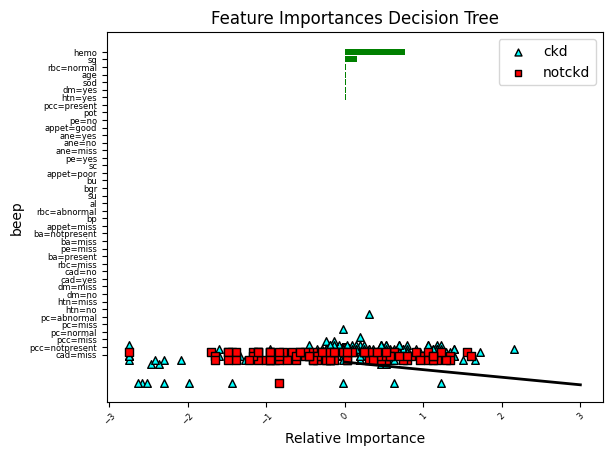

In [122]:
# plotting feature importance for the Decision tree
# grab the column names as a list

features = concat_cols_df.columns

# get the feature importances
important_features = clf_dt2.feature_importances_

# find the indices of a sorted array
feature_indices = np.argsort(important_features)

# make a plot 
plt.title('Feature Importances Decision Tree')
plt.xticks(fontsize=6, rotation = 45)
plt.barh(range(len(feature_indices)), important_features[feature_indices], color='g', align='center')
plt.yticks(range(len(feature_indices)), [features[i] for i in feature_indices], fontsize = 6)
plt.xlabel('Relative Importance')
plt.show()

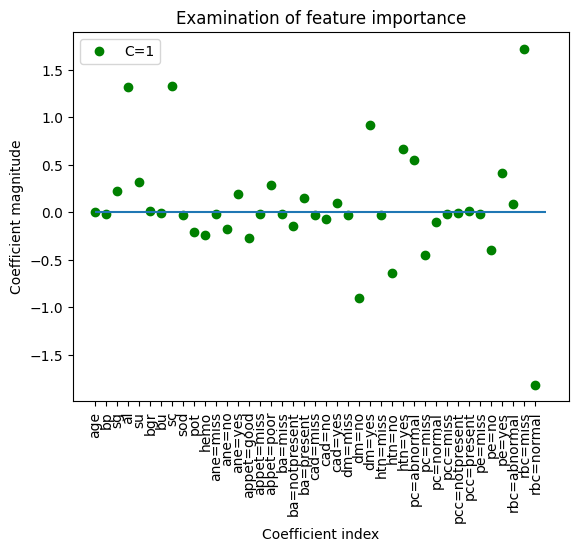

In [123]:
# Reviewing feature importance using the logistic regression and the C parameter
# grab the coefficients and transpose the array
# label the C parameter
plt.plot(np.sort(clf_lr1.coef_.T), 'o', label="C=1",color = "g") 
plt.xticks(range(concat_cols_df.shape[1]), concat_cols_df.columns, rotation=90)
plt.hlines(0, 0, concat_cols_df.shape[1])
plt.title("Examination of feature importance")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [124]:
#!pip install pydotplus -q

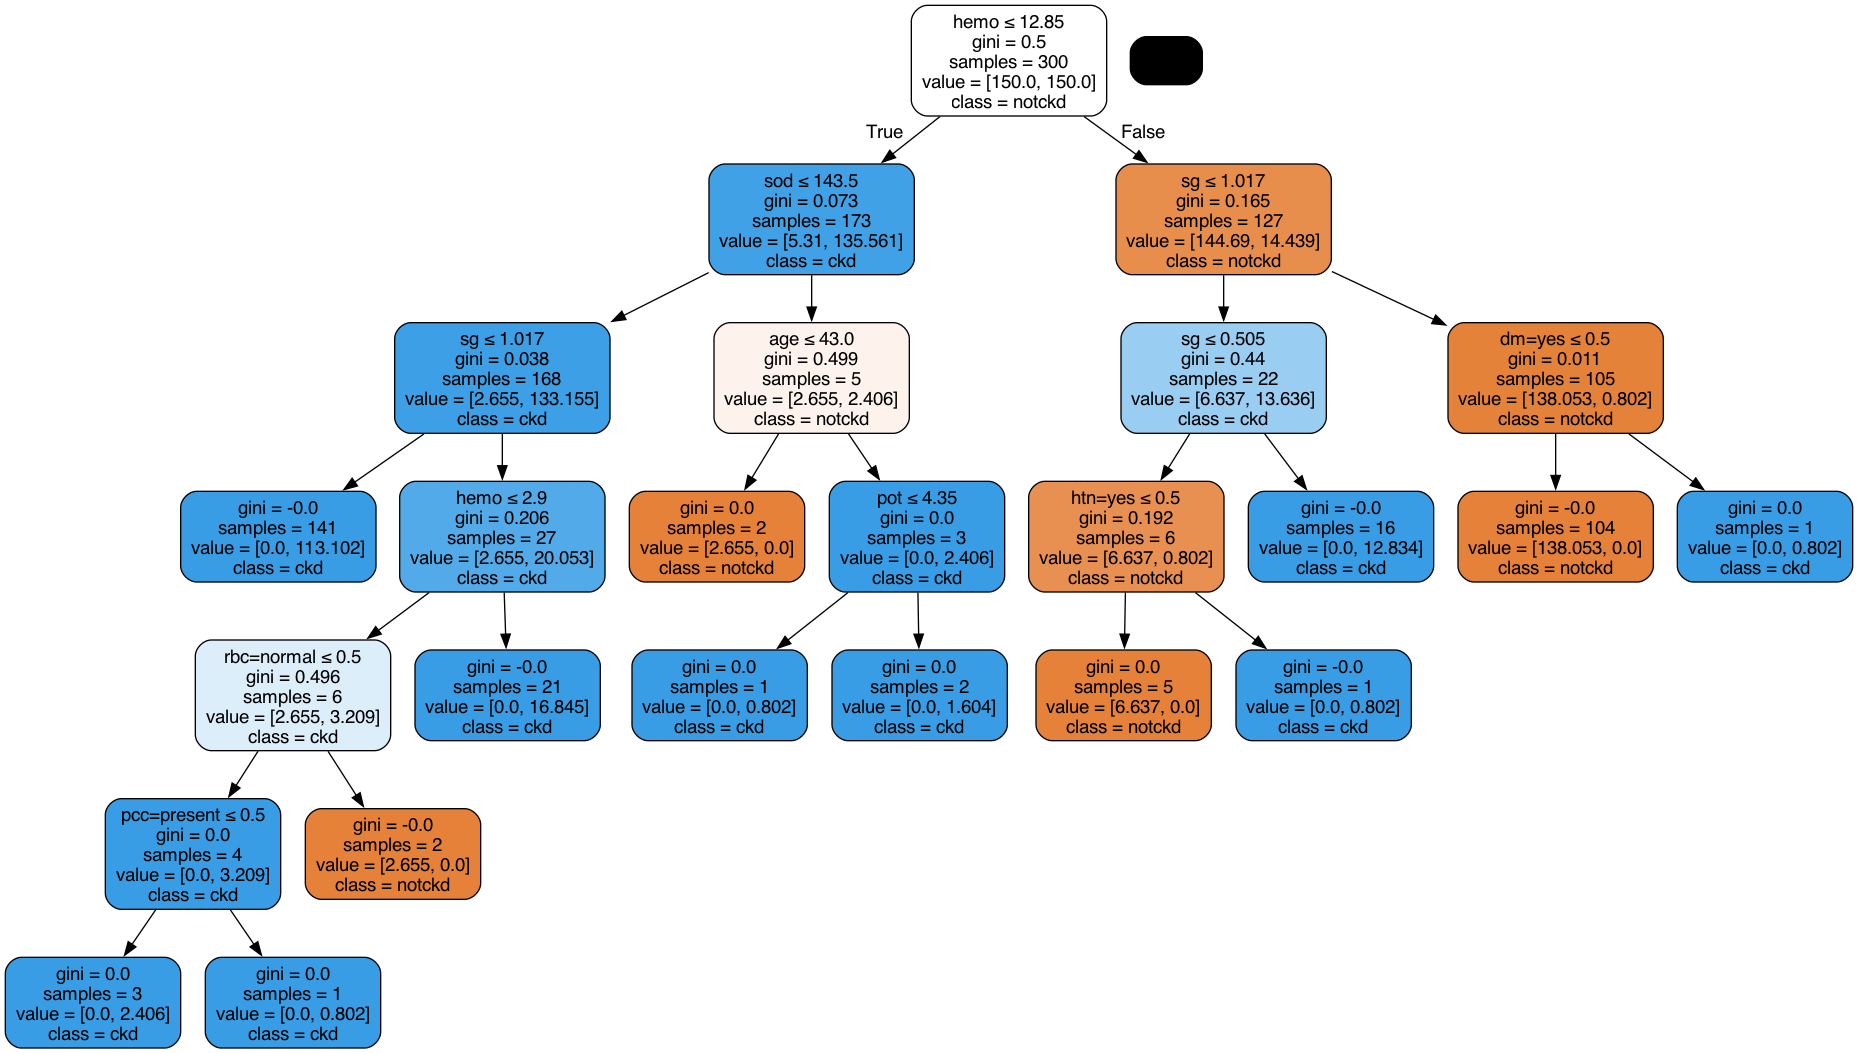

In [125]:
# draw the decision tree 
# add more comments for this
import six
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = six.StringIO()
export_graphviz(clf_dt2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = concat_cols_df.columns, class_names =["notckd", "ckd"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# look at hemo(hemoglobin), sg(specific gravity), al(albumin), sod(sodium), rbc=normal(red blood cells), htn=yes(hypertension), bu(blood urea)
# dm (diabetes mellitus)

1. At the start if the hemoglobin levels were less than or equal to 12.85 on average the samples 300 -- this is every sample of the dataset is split to the left side and hemoglobin levels are less than 12.85 then the level of specific gravity is considered. These features are both looked into the [URI strip](https://en.wikipedia.org/wiki/Urine_test_strip) test done in hospitals can be done at home too. 

2. To the left we now see sodium on average less than or equal to 143.5 being considered. Moving along we see that sodium and specific gravity being considered. This also makes sense especially hemoglobin and specific gravity which are part of the tests done on the kidney function test in a URI strip. Sodium and Potassium are reabsorbed mostly by the kidney but here some is seen maybe they are some other conditions the patient is suffering from. Age less than or equal to 43.2 on average for some patients did not have chronic kidney disease whereas, three had it and their age surpassed 43 to a small extent age can be considered as determining factor. Staying on the left side of the tree we see more patients being classified as having chronic disease as an example after the division by specific gravity 141 samples were placed there without any further subdivision -- 141 in number. On the other hand, for those whose hemoglobin levels mean were greater than to 2.9, 21 samples whose samples but the there's something interesting going on since the gini index (measure of diversity in a set) is negative, normally 0 means that the same is pure and you'll find only those with chronic kidney disease here. But on the other side, where rbc=normal, the condition is true that is, the patients have less rbc=normal and the hemoglobin is less than 2.9, we see that 4 patients were placed in group of having chronic kidney disease and the other 2 didn't have it completing the left side of the tree.

3. Let's move to the False subdivision where the hemoglobin for patients in this group was more than 12.85 at the root of the tree. In this group, the specific gravity is still being considered whose mean value 1.017 -- this is normal range if using a URI strip test. But later there's a subdivision less than 0.505, this is very low beyond the normal threshold and as you can see 16 patients were classified as having chronic kidney disease. Another branch looks at if the patient has diabetes mellitus (pancreas cells don't release enough insulin or insulin resistance) less than half of the patients, 5 were classified as not having chronic kidney disease and one had chronic kidney disease. Normally a consequence of diabetes mellitus is chronic kidney disease due to the predisposing symptoms of diabetes mellitus. 

4. In the last branch, to the further right we see samples moving from a specific gravity here the specific gravity is greater than 1.017 this is also beyond in the normal threshold then the dm=yes where there are 105 samples, the specific gravity was in the normal range to my knowledge and 104 samples were classified as not having chronic kidney disease and lastly one had chronic kidney disease in the sample.

5. Most of the leaf nodes have a gini index of 0.0 this means the elements in the sample had one of that class in the leaf node this shows that some of the features selected by this decision tree could be really good features to be looked into during diagnosis or progression of a disease to know if the patients could have chronic, acute kidney disease as well as looking at other features like we'll look into when looking at the Logisitic regression classifier. However, the gini index -0.0 is still worrisome because it doesn't make a lot of sense negative 0? it could be a bug in the decision tree implementation or something else. You can find out what's up with that? trying a random forest would be interesting too because the feature dm=yes which means the patient was the group with diabetes mellitus or not seems to be reemerging at some points of the tree.

In [126]:
# interpreting the logistic regression model
clf_lr1.predict(x_test[:1])

array([1])

In [127]:
# checking out the intercept this means that if every feature is 0 what the prediction would be
clf_lr1.intercept_

array([5.79236493])

In [128]:
# checking out the coefficients we'll multiply this by the every value that corresponds to that feature e.g clf_lr1.coef[0] * age[0]
clf_lr1.coef_

array([[ 6.17712906e-03, -1.83359948e-02,  2.21319801e-01,
         1.32248048e+00,  3.18708472e-01,  1.27086841e-02,
        -6.93591316e-03,  1.32534924e+00, -2.48098521e-02,
        -2.02283432e-01, -2.32198791e-01, -2.15603538e-02,
        -1.70080874e-01,  1.90966549e-01, -2.69960061e-01,
        -2.15603538e-02,  2.90845736e-01, -1.61505637e-02,
        -1.39886217e-01,  1.55362101e-01, -2.93204123e-02,
        -7.07073516e-02,  9.93530852e-02, -2.93204123e-02,
        -8.95072585e-01,  9.23718318e-01, -2.93204123e-02,
        -6.35569494e-01,  6.64215228e-01,  5.54467659e-01,
        -4.51599828e-01, -1.03542509e-01, -1.61505637e-02,
        -6.27740072e-04,  1.61036250e-02, -2.15603538e-02,
        -3.93993532e-01,  4.14879207e-01,  8.83549417e-02,
         1.72312701e+00, -1.81215663e+00]])

In [129]:
# checking out the available columns
concat_cols_df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'ane=miss', 'ane=no', 'ane=yes', 'appet=good', 'appet=miss',
       'appet=poor', 'ba=miss', 'ba=notpresent', 'ba=present', 'cad=miss',
       'cad=no', 'cad=yes', 'dm=miss', 'dm=no', 'dm=yes', 'htn=miss', 'htn=no',
       'htn=yes', 'pc=abnormal', 'pc=miss', 'pc=normal', 'pcc=miss',
       'pcc=notpresent', 'pcc=present', 'pe=miss', 'pe=no', 'pe=yes',
       'rbc=abnormal', 'rbc=miss', 'rbc=normal'],
      dtype='object')

In [130]:
# make a dataframe to help easily grab the coefficients for writing the formula and visualizing the data
# transpose to see it clearly 
important_features2 = clf_lr1.coef_[0]
column_coef = pd.DataFrame(list(zip(important_features2.T.ravel("C").tolist(), features)),columns = ["coefficient", "feature"])
column_coef["coefficient"] = column_coef["coefficient"].astype("float32")
column_coef.T

0         1        2        3         4         5   \
coefficient  0.006177 -0.018336  0.22132  1.32248  0.318708  0.012709   
feature           age        bp       sg       al        su       bgr   

                   6         7        8         9   ...         31        32  \
coefficient -0.006936  1.325349 -0.02481 -0.202283  ...  -0.103543 -0.016151   
feature            bu        sc      sod       pot  ...  pc=normal  pcc=miss   

                         33           34       35        36        37  \
coefficient       -0.000628     0.016104 -0.02156 -0.393994  0.414879   
feature      pcc=notpresent  pcc=present  pe=miss     pe=no    pe=yes   

                       38        39          40  
coefficient      0.088355  1.723127   -1.812157  
feature      rbc=abnormal  rbc=miss  rbc=normal  

[2 rows x 41 columns]

In [131]:
# arrange the coeffiecients in descending order to know the most likely features
column_coef.sort_values(by=["coefficient"], axis = 0, inplace=True, ascending=False)
print(column_coef.head(10))

    coefficient      feature
39     1.723127     rbc=miss
7      1.325349           sc
3      1.322480           al
25     0.923718       dm=yes
28     0.664215      htn=yes
29     0.554468  pc=abnormal
37     0.414879       pe=yes
4      0.318708           su
16     0.290846   appet=poor
2      0.221320           sg


missing rbcs was a most important feature. I will not take that since it mostly has missing values in fact 152 sample patient results are missing. I think the best course of action is to get the data from the patients about RBCs or drop the column entirely for modelling -- there's an issue with that rationale since some patients may not come back or can't afford to do the test. al - albumin levels, sc - serum creatinine, dm=yes the patient having diabetes mellitus and htn - hypertension these are all crucial kidney function tests or predisposing features of a patient that could be having chronic kidney disease based on my background. The additional features that have been highlighted are also important but have lower values as compared to the ones mentioned prior.

In a more technical perspective these features make sense for instance the albumin which is a large protein that is not supposed to pass through as a glomerular filtrate in the proximal convoluted tubule to the urine since the patient could have a high blood pressure yet another predisposing feature that could fuel kidney diseases either acutely or chronicly to the patients being classified as having chronic kidney disease at least for those features. How does hypertension do it? If the blood pressure is high according to the anatomy of the kidney we'll see a faster rate of filtration and the pressure may damage the glomerulus. Imagine trying to use a sieve with a fast flowing liquid and particules just a bit larger than the sieve. Over a long period of time some of those particles may pass through. 

In [132]:
x_test[:1] # see all the features in the first column 

age    bp    sg   al   su    bgr    bu   sc    sod  pot  ...  pc=normal  \
147  60.0  60.0  1.01  3.0  1.0  288.0  36.0  1.7  130.0  3.0  ...        0.0   

     pcc=miss  pcc=notpresent  pcc=present  pe=miss  pe=no  pe=yes  \
147       0.0             0.0          1.0      0.0    1.0     0.0   

     rbc=abnormal  rbc=miss  rbc=normal  
147           0.0       0.0         1.0  

[1 rows x 41 columns]

In [133]:
x_test.shape # see the number of rows and columns

(100, 41)

In [134]:
# writing the logistic regression formula
# Bo intercept, B1 x1n
# writing the denominator based on the wikipedia entry https://en.wikipedia.org/wiki/Logistic_regression
# 1/ np.exp(-(weight * coefn + clf_lr1.intercept_))
weights_int_bias = clf_lr1.intercept_ + (column_coef.coefficient[0] * 60.0) + (column_coef.coefficient[1] * 60.0) + (column_coef.coefficient[2] * 1.01) + (column_coef.coefficient[3] + 3.0) + (column_coef.coefficient[4] + 1.0) + (column_coef.coefficient[5] * 288) + (column_coef.coefficient[6] * 36.0) + (column_coef.coefficient[7] * 1.7) + (column_coef.coefficient[8] * 130) + (column_coef.coefficient[9] * 3.0) + (column_coef.coefficient[10] * 7.9) + (column_coef.coefficient[11] * 0.0) + (column_coef.coefficient[12] * 0.0) + (column_coef.coefficient[13] * 1.0) + (column_coef.coefficient[14] * 0.0) + (column_coef.coefficient[15] * 0.0) + (column_coef.coefficient[16] * 1.0) + (column_coef.coefficient[17] * 0.0) + (column_coef.coefficient[18] * 1.0) + (column_coef.coefficient[19] * 0.0) + (column_coef.coefficient[20] * 0.0) + (column_coef.coefficient[21] * 1.0) + (column_coef.coefficient[22] * 0.0) + (column_coef.coefficient[23] * 0.0) + (column_coef.coefficient[24] * 1.0) + (column_coef.coefficient[25] * 0.0) +  (column_coef.coefficient[26] * 0.0) + (column_coef.coefficient[27] * 1.0) + (column_coef.coefficient[28] * 1.0) + (column_coef.coefficient[29] * 0.0) + (column_coef.coefficient[30] * 0.0) + (column_coef.coefficient[31] * 0.0) + (column_coef.coefficient[32] * 0.0) + (column_coef.coefficient[33] * 1.0) + (column_coef.coefficient[34] * 0.0) + (column_coef.coefficient[35] * 0.0) + (column_coef.coefficient[36] * 0.0) + (column_coef.coefficient[37] * 0.0) + (column_coef.coefficient[38] * 0.0) + (column_coef.coefficient[39] * 1.0)

In [135]:
# add the sigmoid function to make the decision
# One way to make the loss function
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))


print(sigmoid(weights_int_bias))

[0.99999417]


In [136]:
# according to wikipedia implementation: sigmoid function
1 / (1 + np.exp(-weights_int_bias))

array([0.99999417])

Get a single row of features and add it onto the model above and confirm if you get the same result as above.

In [137]:
clf_lr1.predict(x_test[:1]) # has chronic kidney disease for the 147th id

array([1])

Conclusion:
---    
I think I was onto something because if you review the feature importance the **hemoglobin**, **albumin**, **hypertension**, **serum creatinine** and **specific gravity** were the most important features. I've done some tests with a uri strip to figure out if someone has an issue with their kidney and these are the parameters that point out to dysfunction of the kidney. Others like having diabetes mellitus though this is related to pancreatic beta cells issues, sodium levels taken up again by the kidney and age could also be indicators. The decision tree is also interesting but could use some tuning. The intercept says that on default the patient doesn't have chronic disease as well but the decision tree the start was hemoglobin. In future I will update the plots to show how the decision was made better. Otherwise, I'd discuss these results with a medical practitioner like a urologist. What do you think?